In [91]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [99]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)
print reg.coef_
print reg.score(ages_test, net_worths_test)

[[ 5.07793064]]
0.878262470366


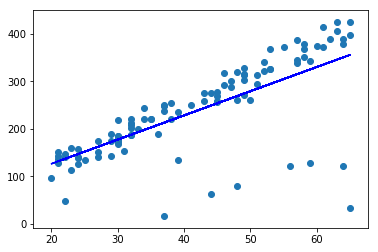

In [93]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [94]:
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
        
        Predictions are made using ages_train data
    """
    
    """
    cleaned_data = []
    errors = []

    ### your code goes here
    for index, pred in enumerate(predictions):
        square_of_error = ((predictions[index] - net_worths[index]) ** 2)[0]
        # print square_of_error
        errors.append(square_of_error)
        
    errors.sort()
    
    # print "Errors: ", errors
    index_of_limit = int(len(errors)*0.9)
    print "Limit: ", index_of_limit, " number of all elements: ", len(errors)
    error_limit = errors[index_of_limit]
    print "error_limit: ", error_limit
    
    for index, pred in enumerate(predictions):
        error = ((predictions[index] - net_worths[index]) ** 2)[0]
        # print "error: ", error, ", limit: ", error_limit
        # print "age: ", ages[index]
        if error < error_limit:
            cleaned_data.append((ages[index][0], net_worths[index][0], error))
    
    return cleaned_data
    """

    # Better solution found on internet:
    import operator    
    
    errors = [a-b for a,b in zip(predictions, net_worths)]    
    data = zip(ages, net_worths, errors)
    data.sort(key=operator.itemgetter(2))
    cleaned_data = data[:int(len(predictions)*0.9)]
    
    return cleaned_data


In [95]:
### identify and remove the most outlier-y points

# from outlier_cleaner import outlierCleaner

cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
    # print cleaned_data
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

len of original:  90  len of cleaned:  81


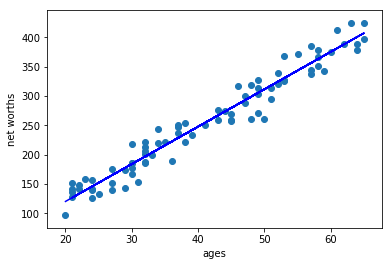

coef:  [[ 6.36859481]]
0.983189455396


In [98]:
### only run this code if cleaned_data is returning data
print "len of original: ", len(predictions), " len of cleaned: ", len(cleaned_data)
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
    
    print "coef: ", reg.coef_
    print reg.score(ages_test, net_worths_test)


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"